## Uber is a taxi service provider as we know, we need to predict the high booking area using an Unsupervised algorithm and price for the location using a supervised algorithm and use some map function to display the data

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import folium
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [62]:
df = pd.read_csv('Data/rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [63]:
df.shape

(693071, 57)

In [64]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,...,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,...,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,...,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,...,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,...,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,...,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,...,0.091600,1.544807e+09,38.880000,1.544789e+09,46.910000,1.544814e+09,35.710000,1.544789e+09,44.120000,1.544818e+09
max,1.545161e+09,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,...,0.145900,1.545152e+09,43.100000,1.545192e+09,57.870000,1.545109e+09,40.050000,1.545134e+09,57.200000,1.545109e+09


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

### Data Clearning

In [66]:
# Checking null values and removing them if present

df.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [67]:
# We can remove null values but removing 55k is like removing 8% data

median = df['price'].median()
df['price'].fillna(median, inplace=True)

df['price'].isna().sum()

0

In [16]:
taxi = df.copy()

In [17]:
# Removing the unwanted columns

taxi = taxi.drop(['id', 'datetime', 'timezone', 'timestamp','latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',"product_id",
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'], axis=1)

taxi.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0


### Exploring Data

In [79]:
# PLOTTING MAP

from folium.features import DivIcon
from IPython.display import IFrame

colors = {'Lyft' : 'red', 'Uber' : 'blue'}


map_osm = folium.Map(location=[df['latitude'].iloc[0], df['longitude'].iloc[0]], 
                     zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker(location=[row["latitude"], row["longitude"]], 
                                radius=5, fill_color=colors[row['cab_type']]).add_to(map_osm)

    folium.Marker(location=[row["latitude"], row["longitude"]], icon=DivIcon(icon_size=(150,36), icon_anchor=(0,0),
        html='<div style="font-size: 16pt; color : {}">{}</div>'.format(colors[row['cab_type']], 
                                                                        row['cab_type']))).add_to(map_osm)


map_osm.save('map.html')
iframe = IFrame(src='map.html', width='100%', height='500px')
display(iframe)

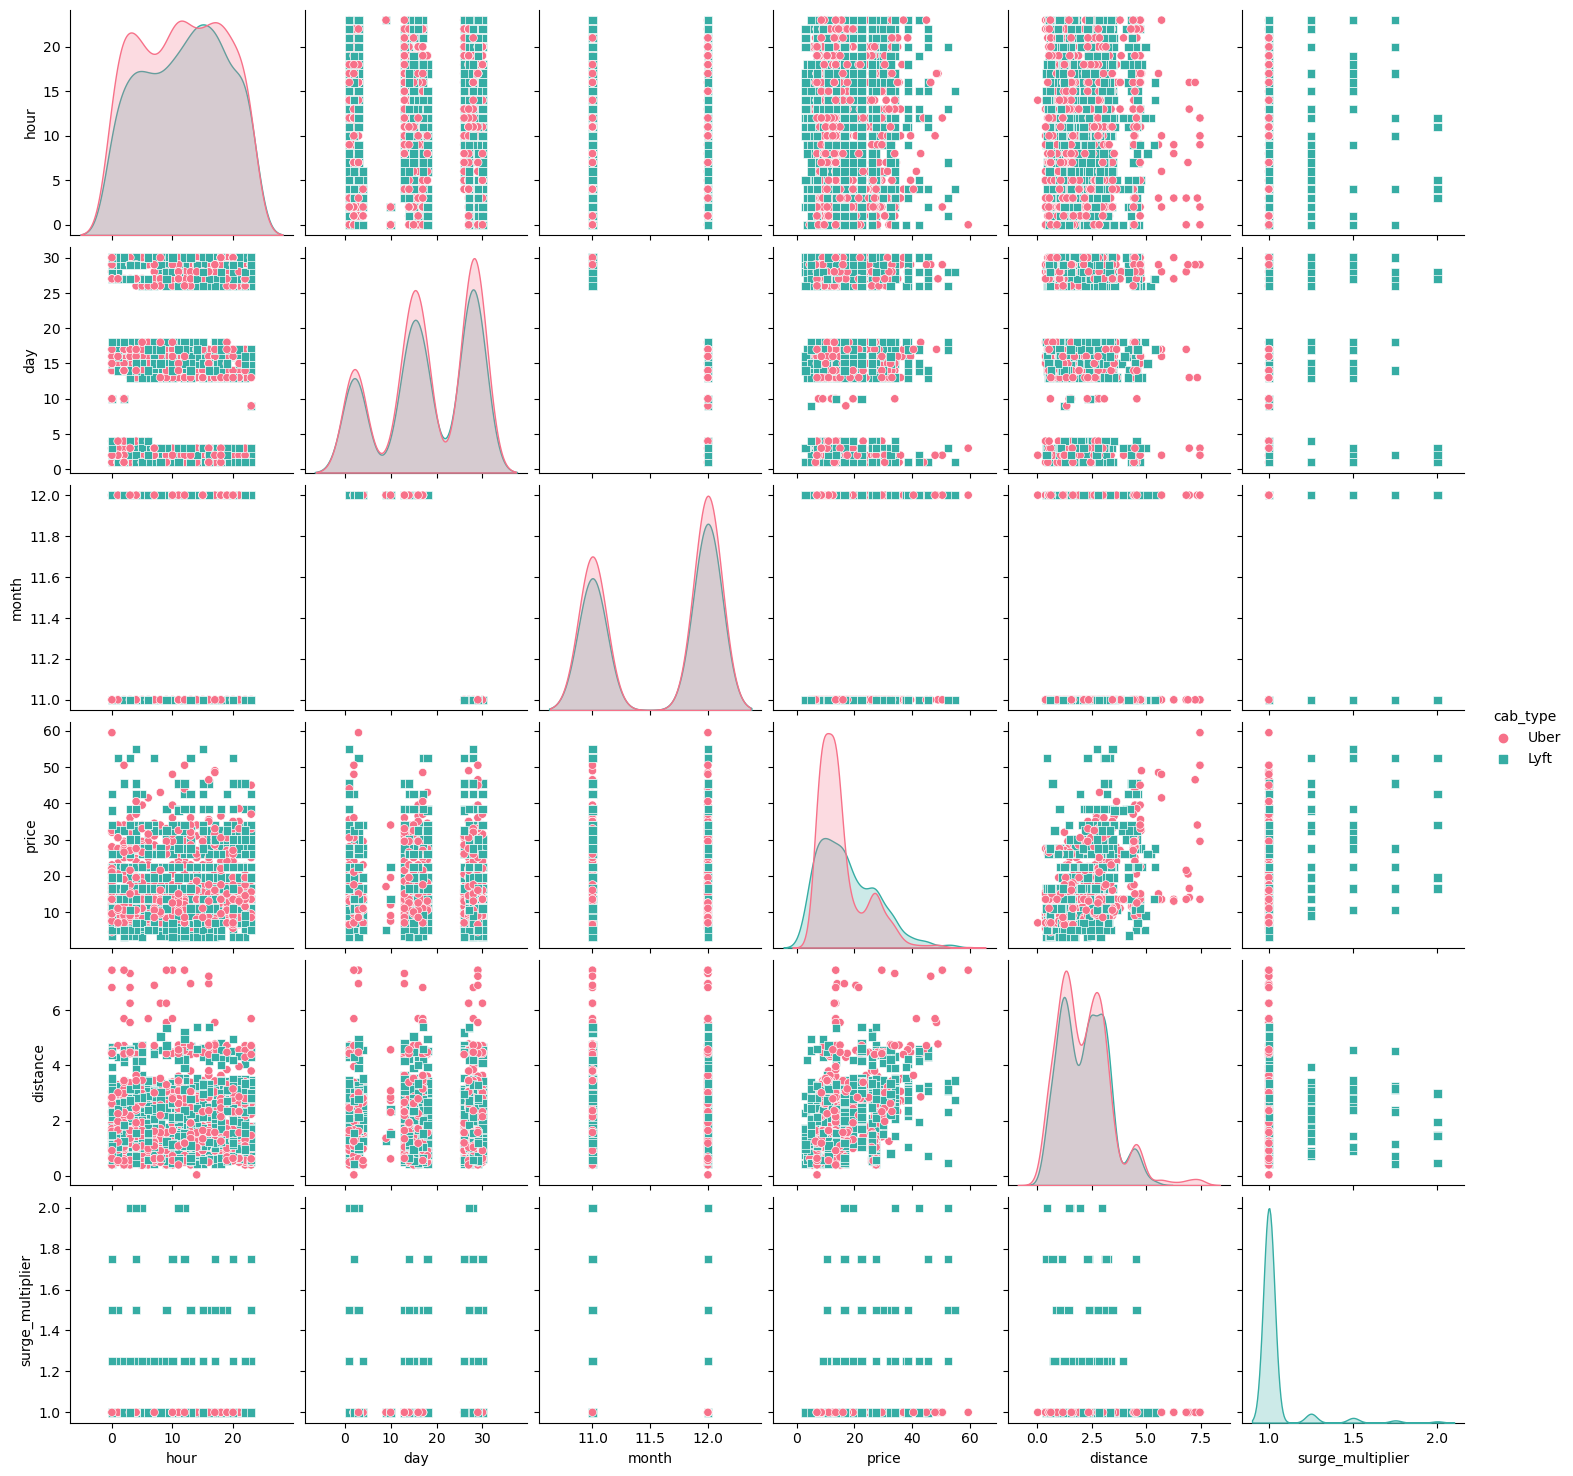

In [18]:
sns_pairplot = sns.pairplot(taxi.sample(2000), 
                            hue="cab_type", 
                            markers=["o","s"],
                            diag_kind="kde",
                            kind="scatter",
                            palette="husl")

<Axes: >

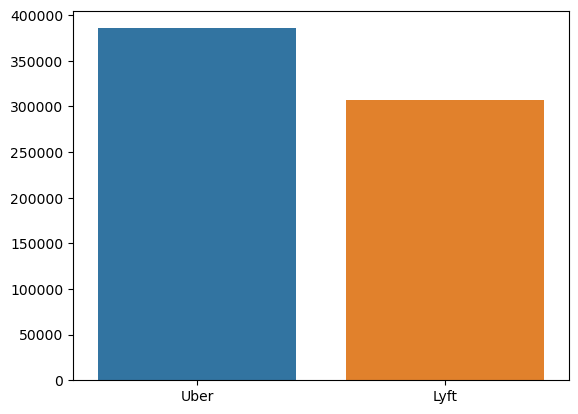

In [20]:
sns.barplot(x=taxi['cab_type'].value_counts().index, 
              y=taxi['cab_type'].value_counts().values)

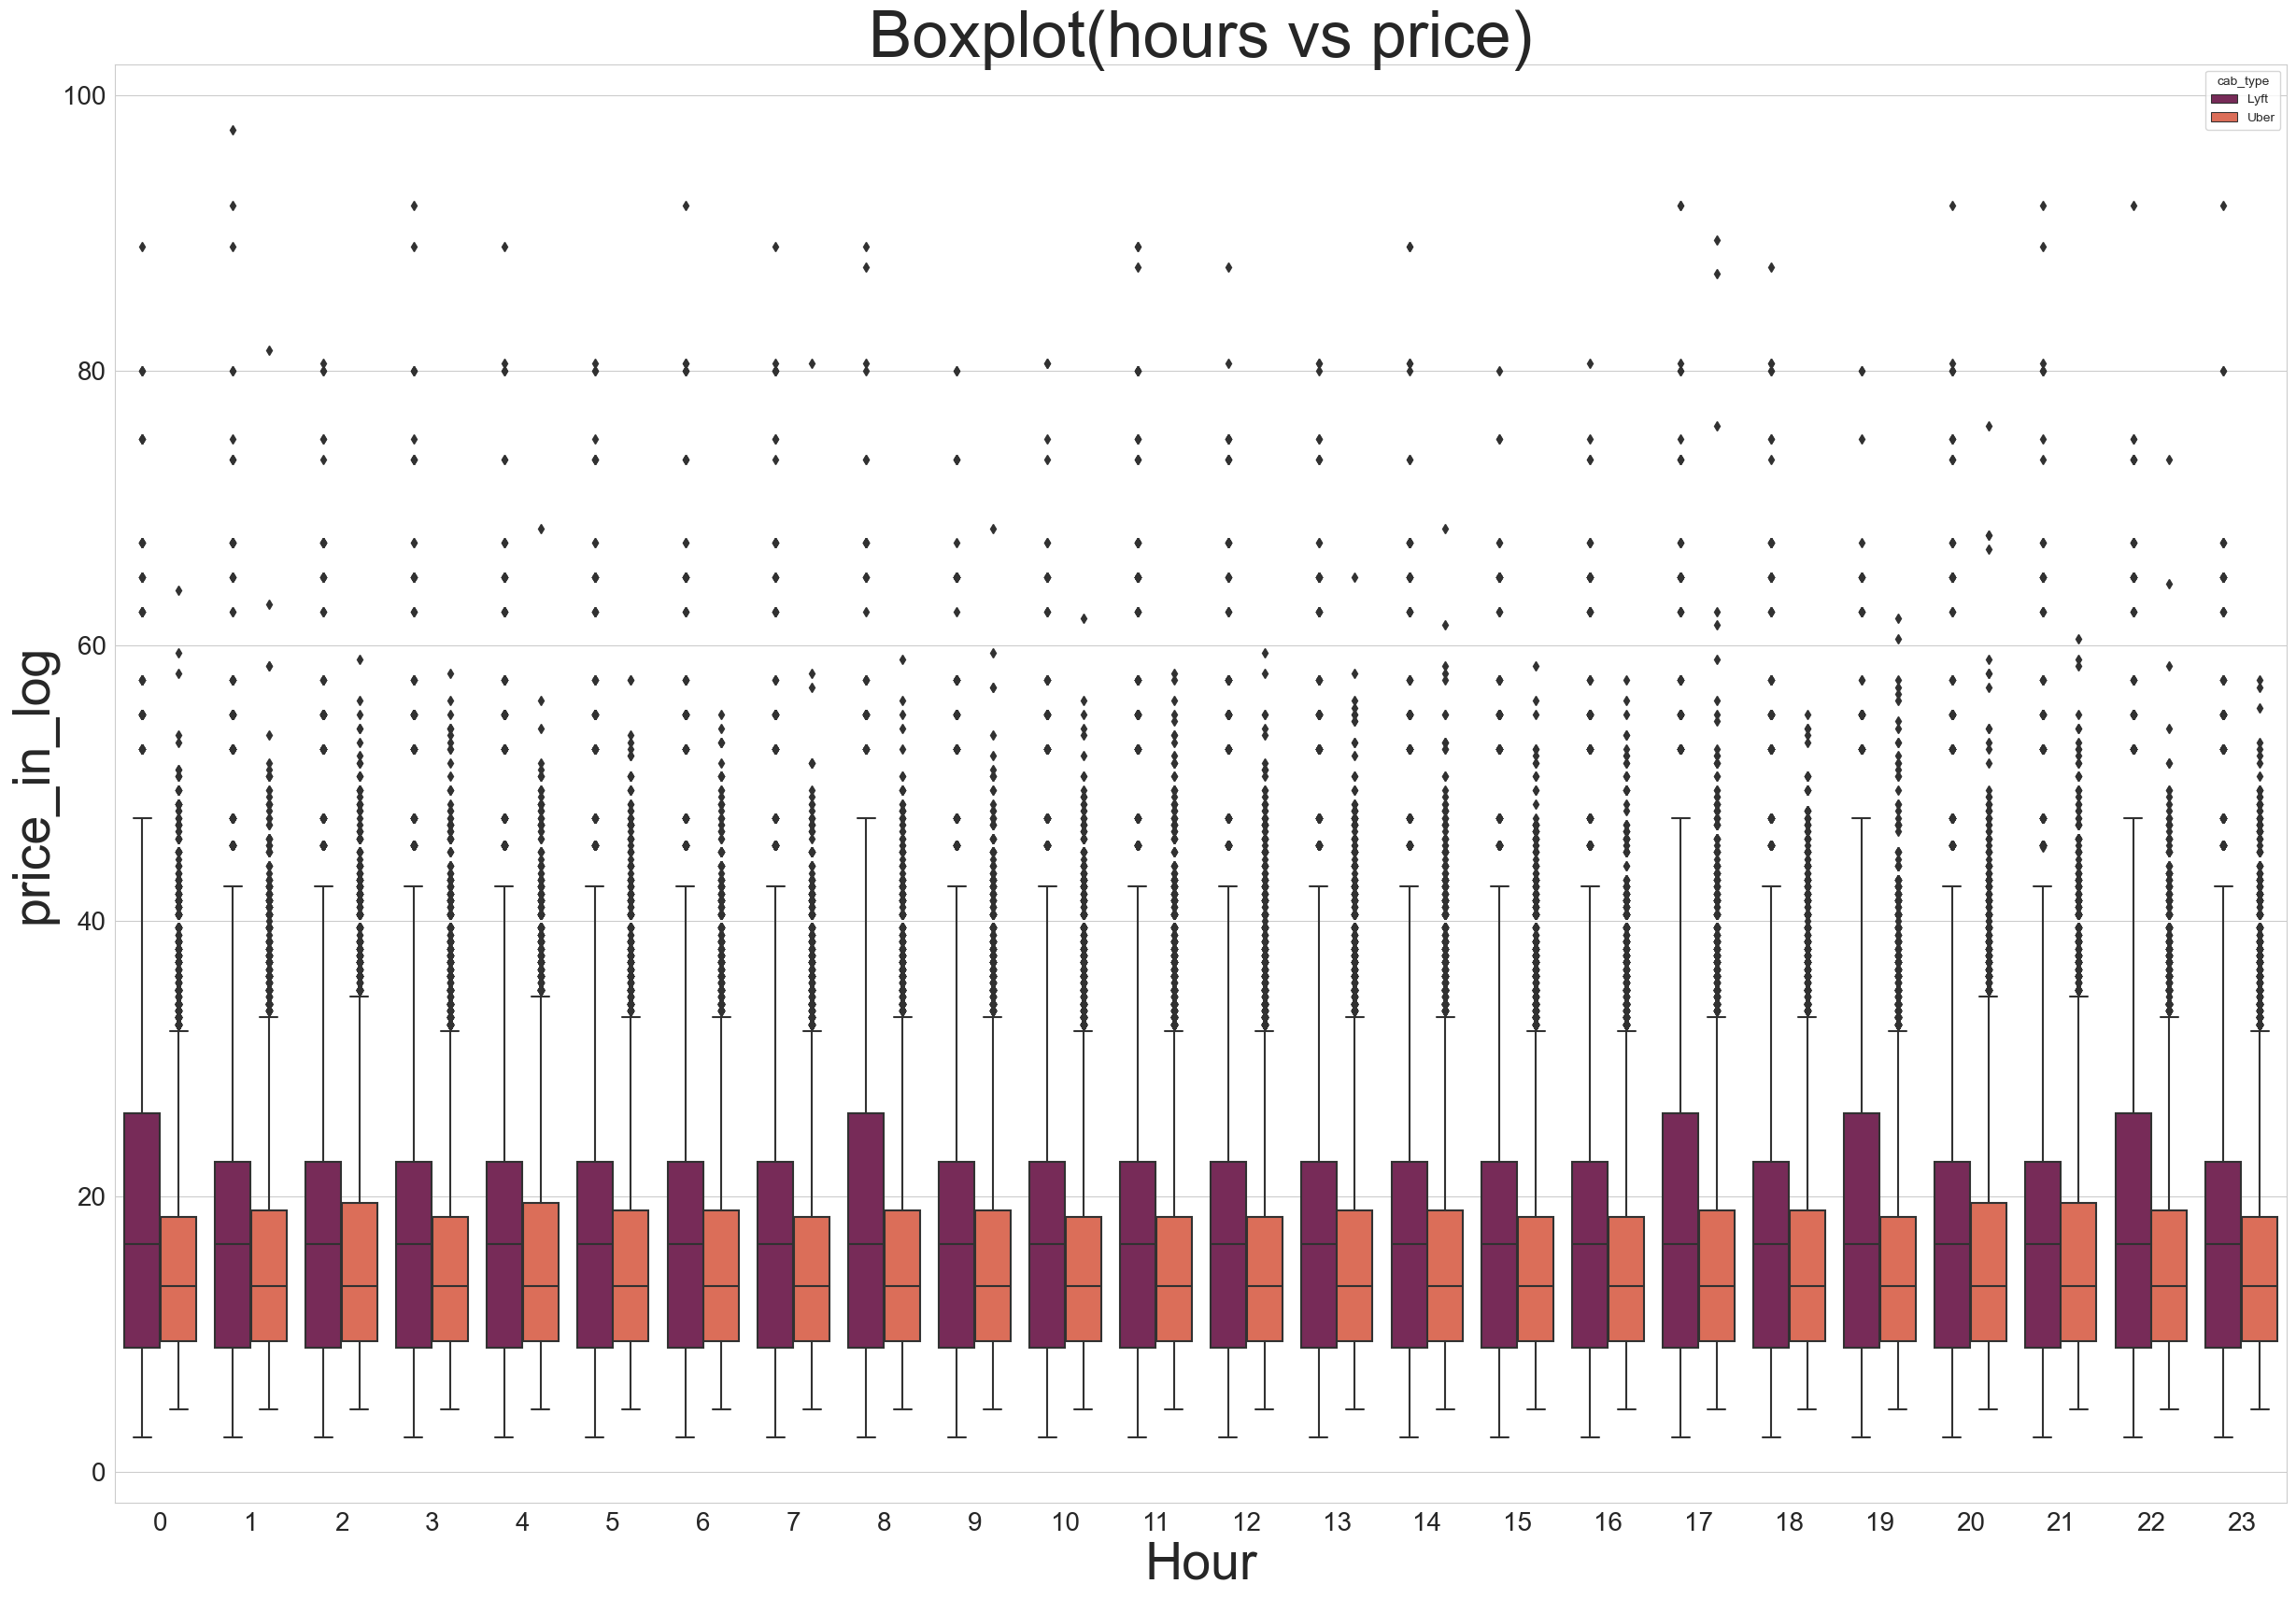

In [23]:
# Checking outliers in data

plt.figure(figsize=(30,20))
sns.set_style("whitegrid")
sns.boxplot(x="hour", y="price",data=taxi, hue="cab_type",palette="rocket")
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.xlabel("Hour",fontsize=40)
plt.ylabel("price_in_log",fontsize=40)
plt.title("Boxplot(hours vs price)",fontsize=50)
plt.show()

> So many outliers are present in uber

In [27]:
# Removing outliers

quantiles = stats.mstats.mquantiles(taxi["price"] , prob=[0.25,0.75])
IQR= stats.iqr(taxi["price"])
upper = quantiles[1]+(1.5*IQR)
lower = quantiles[0]-(1.5*IQR)
taxi.loc[taxi["price"]>upper,"price"]= np.nan
taxi.loc[taxi["price"]<lower,"price"]= np.nan
taxi.price.isnull().sum()

7982

In [34]:
# Replacing 7982 outliers with median value

median = taxi['price'].median()
taxi['price'].fillna(median, inplace=True)

C:\Users\himz\AppData\Local\Temp\ipykernel_20200\664316168.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = taxi.corr()


<Axes: title={'center': 'Uber and Lyft Heat Map'}>

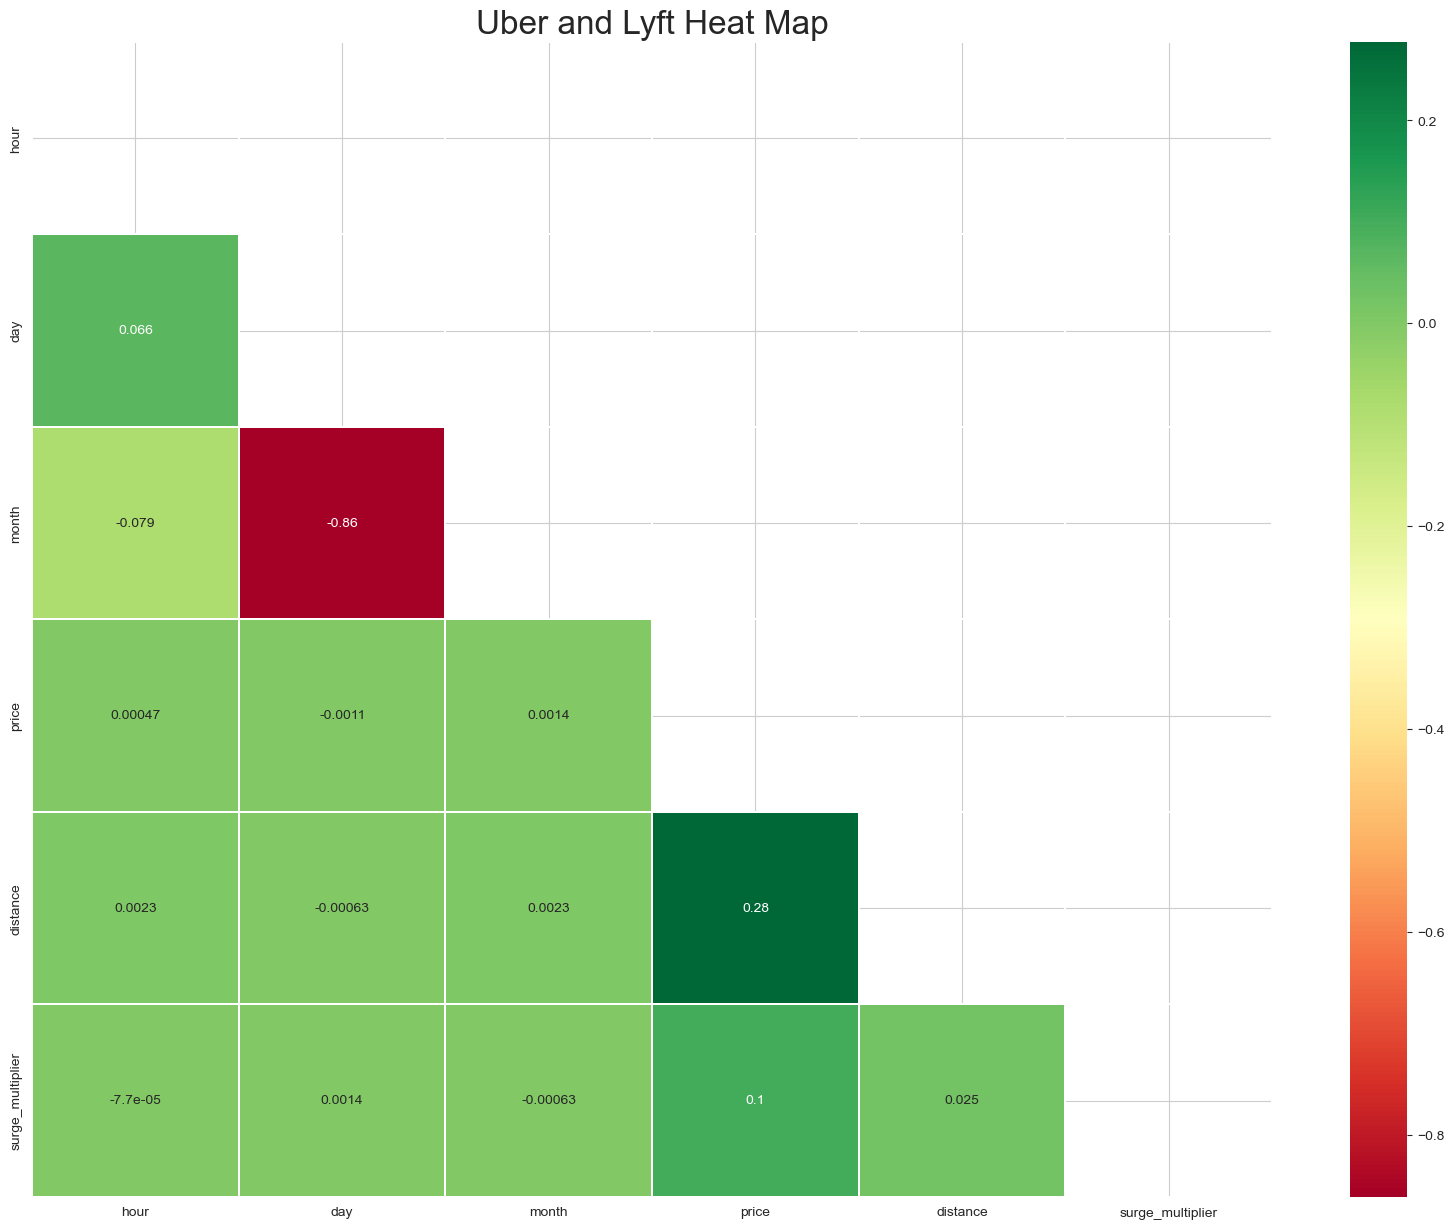

In [36]:
corrmat = taxi.corr()

fig, ax = plt.subplots(figsize=(20,15))
title = "Uber and Lyft Heat Map"
plt.title(title,fontsize=24)
ttl = ax.title
ttl.set_position([0.5,1.05])
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, mask=mask, annot=True, cmap='RdYlGn', linewidths=0.20, ax=ax)

### Data Preparation

In [37]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              693071 non-null  int64  
 1   day               693071 non-null  int64  
 2   month             693071 non-null  int64  
 3   source            693071 non-null  object 
 4   destination       693071 non-null  object 
 5   cab_type          693071 non-null  object 
 6   name              693071 non-null  object 
 7   price             693071 non-null  float64
 8   distance          693071 non-null  float64
 9   surge_multiplier  693071 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 52.9+ MB


In [39]:
# Extracting categorical columns

cat_cols = taxi.columns[taxi.dtypes == 'object']
cat_cols

Index(['source', 'destination', 'cab_type', 'name'], dtype='object')

In [43]:
for i in cat_cols:
    print(i)
    print(taxi[i].value_counts())

source
Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64
destination
Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64
cab_type
Uber    385663
Lyft    307408
Name: cab_type, dtype: int64
name
UberXL          55096
WAV             55096
Black SUV    

In [51]:
# Converting categorical columnsinto one hot encoding

enc = OneHotEncoder()
taxi_encoded = pd.DataFrame(enc.fit_transform(taxi[cat_cols]).toarray(),
                            columns=['encoded_' + x for x in enc.get_feature_names_out(cat_cols)])

taxi_encoded.head()

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,...,encoded_name_Lux Black,encoded_name_Lux Black XL,encoded_name_Lyft,encoded_name_Lyft XL,encoded_name_Shared,encoded_name_Taxi,encoded_name_UberPool,encoded_name_UberX,encoded_name_UberXL,encoded_name_WAV
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
non_encoded = taxi.drop(columns=cat_cols)
taxi = pd.concat([taxi_encoded, non_encoded], axis=1)

taxi.head()

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,...,encoded_name_UberPool,encoded_name_UberX,encoded_name_UberXL,encoded_name_WAV,hour,day,month,price,distance,surge_multiplier
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,9,16,12,5.0,0.44,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2,27,11,11.0,0.44,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,28,11,7.0,0.44,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4,30,11,26.0,0.44,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3,29,11,9.0,0.44,1.0


In [56]:
scaler = StandardScaler()
taxi_1 = pd.DataFrame(scaler.fit_transform(taxi), columns=taxi.columns)

taxi_1.head()

,encoded_source_Back Bay,encoded_source_Beacon Hill,encoded_source_Boston University,encoded_source_Fenway,encoded_source_Financial District,encoded_source_Haymarket Square,encoded_source_North End,encoded_source_North Station,encoded_source_Northeastern University,encoded_source_South Station,...,encoded_name_UberPool,encoded_name_UberX,encoded_name_UberXL,encoded_name_WAV,hour,day,month,price,distance,surge_multiplier
0,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-0.376957,-0.179755,0.839341,-1.318906,-1.536021,-0.151349
1,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.384425,0.922198,-1.191411,-0.593223,-1.536021,-0.151349
2,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.528349,1.022375,-1.191411,-1.077012,-1.536021,-0.151349
3,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.096577,1.222730,-1.191411,1.220985,-1.536021,-0.151349
4,-0.301614,-0.300505,-0.301534,-0.301514,-0.304636,3.317249,-0.301532,-0.299691,-0.301512,-0.301494,...,-0.293858,-0.293866,-0.293872,-0.293872,-1.240501,1.122553,-1.191411,-0.835117,-1.536021,-0.151349


### Model Training

#### UNSUPERVISED TRAINING

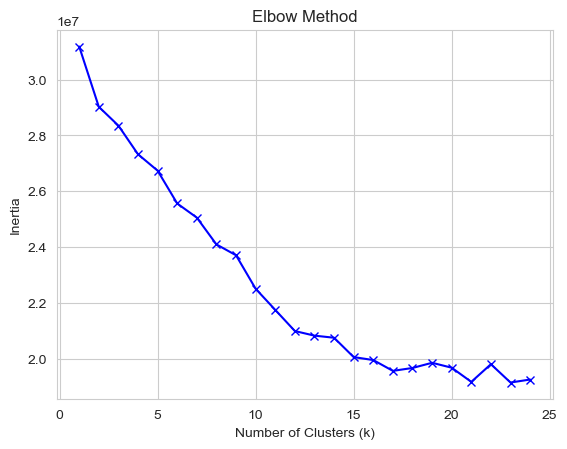

In [59]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# List of number of clusters to evaluate
k_values = range(1, 25)

# Initialize list to store the sum of squared distances (inertia) for each value of k
inertias = []

# Perform K-means clustering for each value of k and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=1)
    kmeans.fit(taxi_1)
    inertias.append(kmeans.inertia_)

# Plot the inertia values for different k values
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


#### SUPERVISED TRAINING 

In [80]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

In [84]:
X = taxi_1.drop(columns=['price'], axis=1).values
y = taxi_1['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
model = linear.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8484397691023574

In [86]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

0.15174779385650586
0.38954819195640716
